In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np
import numpy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

from optimizers import *

In [2]:
fBeale  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
fHimmelblau = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2
fBohachevsky = lambda x, y: x**2 + 2*y**2 - 0.3*numpy.cos(3*3.14*x) -     0.4*numpy.cos(4*3.14*y) + 0.7
fTrid = lambda x, y: (x-1)**2 + (y-1)**2 - x*y
fBooth = lambda x, y: (x + 2*y - 7)**2 + (2*x + y - 5)**2
fMatyas = lambda x, y: 0.26*(x**2 + y**2) - 0.48*x*y
fZakharov = lambda x, y: (x**2 + y**2) + (0.5*x + y)**2 + (0.5*x + y)**4
fRozenbrock = lambda x, y: (1-x)**2 + 100*(y - x**2)**2
fSix_hump = lambda x, y: (4 - 2.1*x**2 + x**4/3)*x**2 + x*y + (-4 + 4*y**2)*y**2

f = fHimmelblau

In [3]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x0 = np.array([0., -4.])

In [4]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [5]:
z = f(x, y)

In [6]:
minima = np.array([3., 2.])
minima_ = minima.reshape(-1, 1)

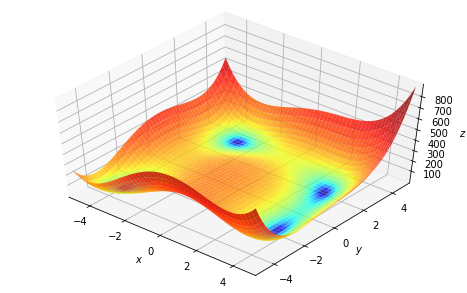

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
#ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [8]:
def plotRes(path):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    #ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*pathA[::,:i])
    point.set_data(*pathA[::,i-1:i])
    return line, point

def reducePath(path):
    return np.vstack((path[0][0::2], path[1][0::2]))

def plotAnim(path, label):
    global line, point, pathA, anim
    pathA = reducePath(path)
    
    fig, ax = plt.subplots(figsize=(10, 6));
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    #ax.plot(*minima_, 'r*', markersize=18)
    
    line, = ax.plot([], [], 'b', label=label, lw=2)
    point, = ax.plot([], [], 'bo')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.legend(loc='upper left')

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=pathA.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

# SGD

In [9]:
sgd = SGD(f, x0, 0.001)

In [10]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(sgd.step_minimize())
    res.append(xy)

In [11]:
path1 = np.array(res).T
path1.shape

(2, 101)

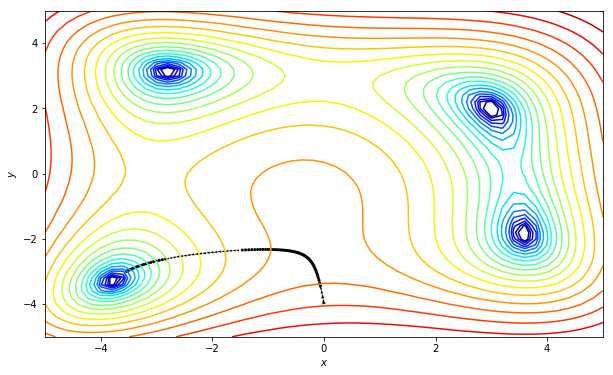

In [12]:
plotRes(path1)

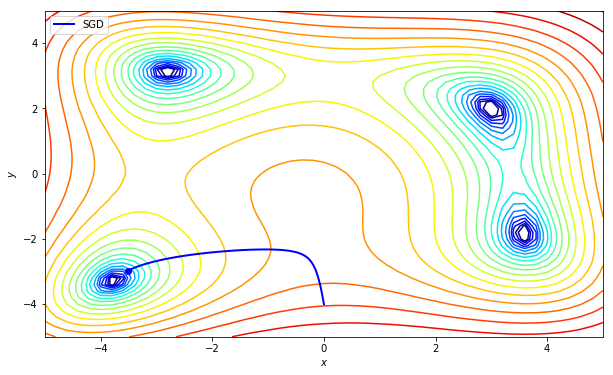

In [13]:
plotAnim(path1, "SGD")
HTML(anim.to_html5_video())

# Momentum

In [14]:
mm = Momentum(f, x0, 0.0015)

In [15]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(mm.step_minimize())
    res.append(xy)

In [16]:
path2 = np.array(res).T
path2.shape

(2, 101)

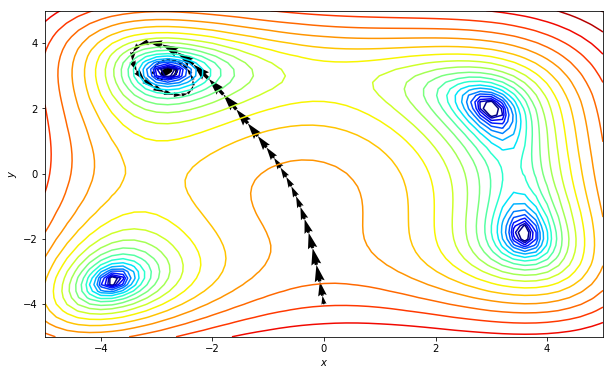

In [17]:
plotRes(path2)

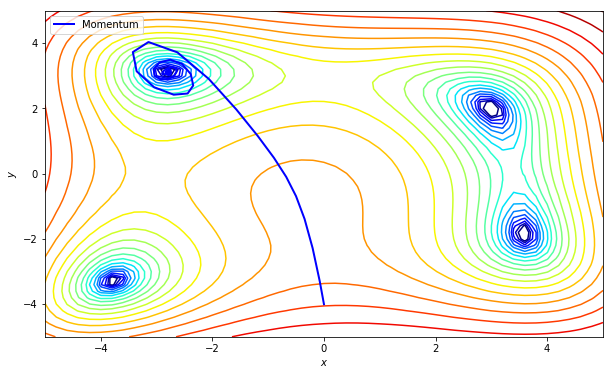

In [18]:
plotAnim(path2, "Momentum")
HTML(anim.to_html5_video())

# NAG

In [19]:
nag = NAG(f, x0, 0.0015)

In [20]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(nag.step_minimize())
    res.append(xy)

In [21]:
path3 = np.array(res).T
path3.shape

(2, 101)

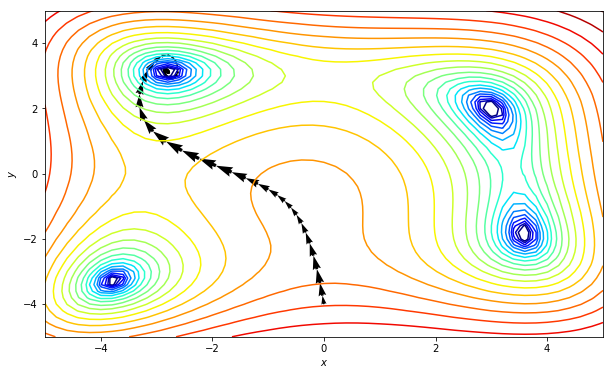

In [22]:
plotRes(path3)

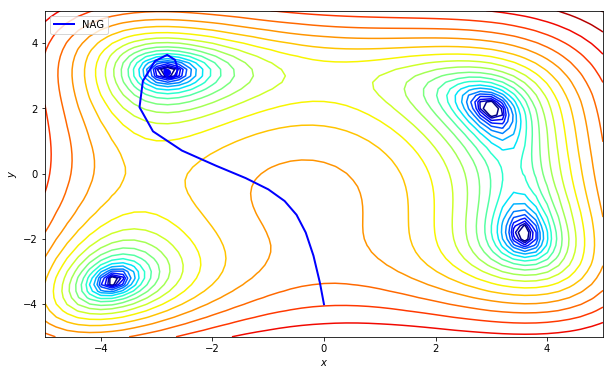

In [23]:
plotAnim(path3, "NAG")
HTML(anim.to_html5_video())

# Adagrad

In [24]:
ada = Adagrad(f, x0, 0.5)

In [25]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(ada.step_minimize())
    res.append(xy)

In [26]:
path4 = np.array(res).T
path4.shape

(2, 101)

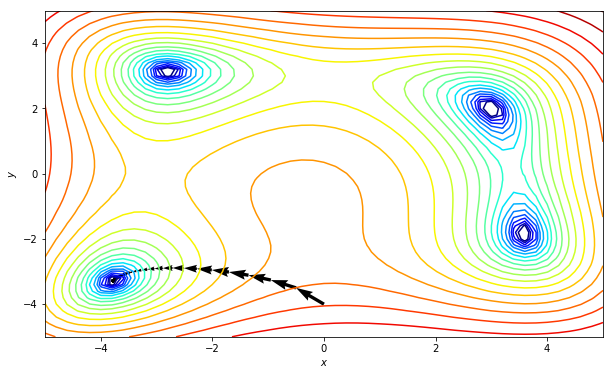

In [27]:
plotRes(path4)

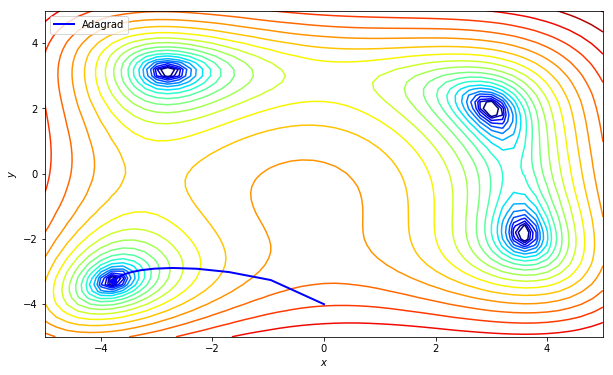

In [28]:
plotAnim(path4, "Adagrad")
HTML(anim.to_html5_video())

# Adadelta

In [29]:
adad = Adadelta(f, x0, 0.01)

In [30]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(adad.step_minimize())
    res.append(xy)

In [31]:
path5 = np.array(res).T
path5.shape

(2, 101)

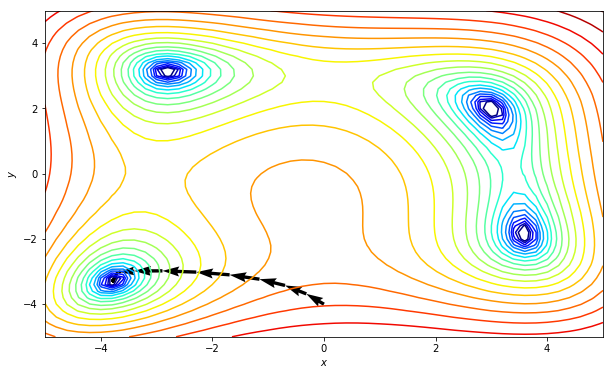

In [32]:
plotRes(path5)

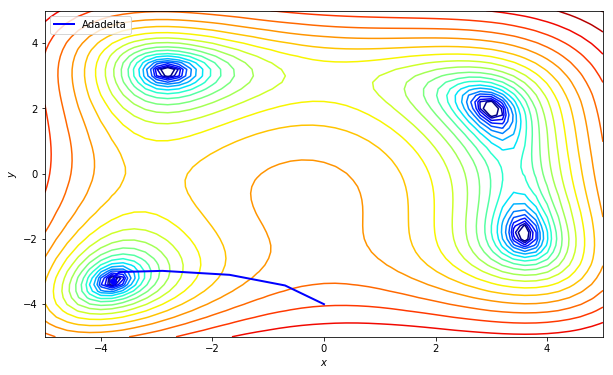

In [33]:
plotAnim(path5, "Adadelta")
HTML(anim.to_html5_video())

# Adam

In [34]:
adam = Adam(f, x0, 0.1)

In [35]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(adam.step_minimize())
    res.append(xy)

In [36]:
path6 = np.array(res).T
path6.shape

(2, 101)

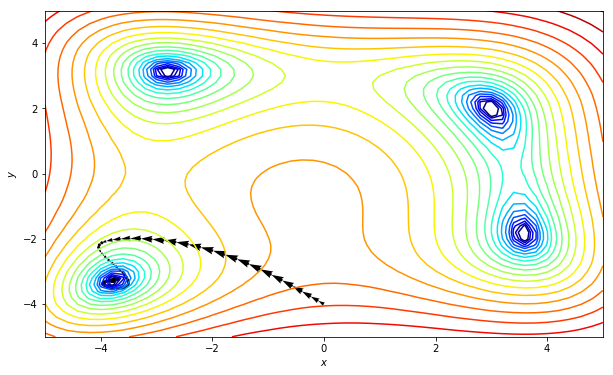

In [37]:
plotRes(path6)

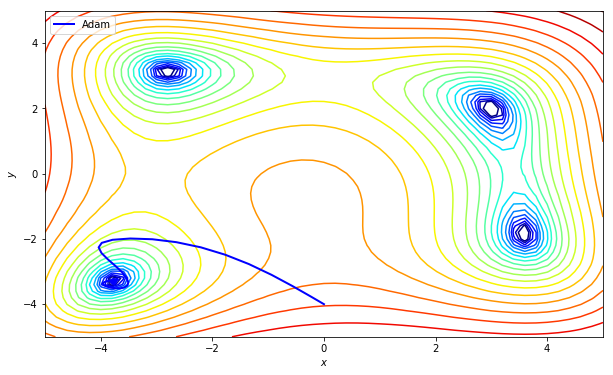

In [38]:
plotAnim(path6, "Adam")
HTML(anim.to_html5_video())

# Nadam

In [39]:
nadam = Nadam(f, x0, 0.1)

In [40]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(nadam.step_minimize())
    res.append(xy)

In [41]:
path7 = np.array(res).T
path7.shape

(2, 101)

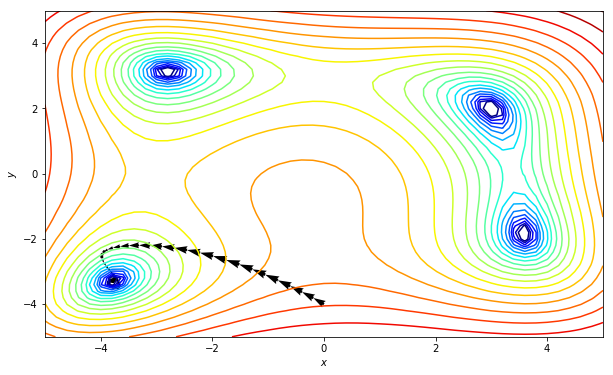

In [42]:
plotRes(path7)

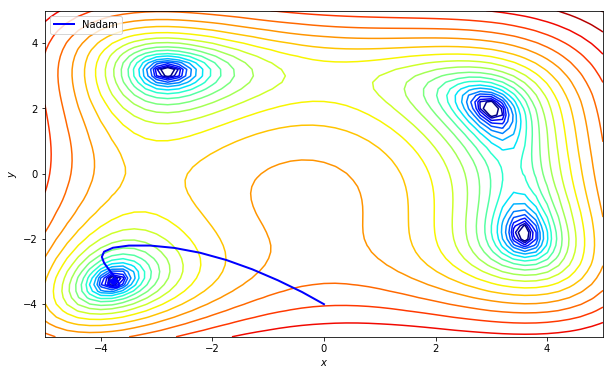

In [43]:
plotAnim(path7, "Nadam")
HTML(anim.to_html5_video())

# AMSGrad

In [44]:
amsgrad = AMSGrad(f, x0, 0.1)

In [45]:
res = [x0]
training_steps = 100
for i in range(0, training_steps):
    xy = np.copy(amsgrad.step_minimize())
    res.append(xy)

In [46]:
path8 = np.array(res).T
path8.shape

(2, 101)

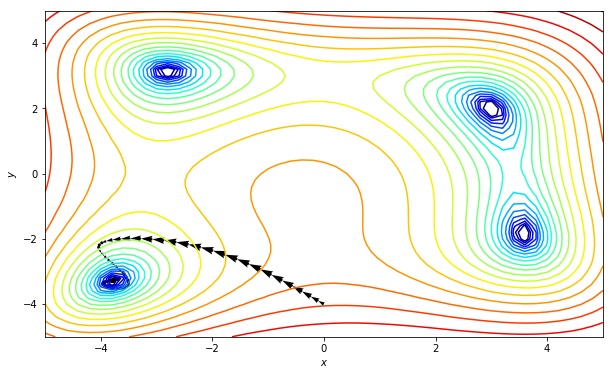

In [47]:
plotRes(path8)

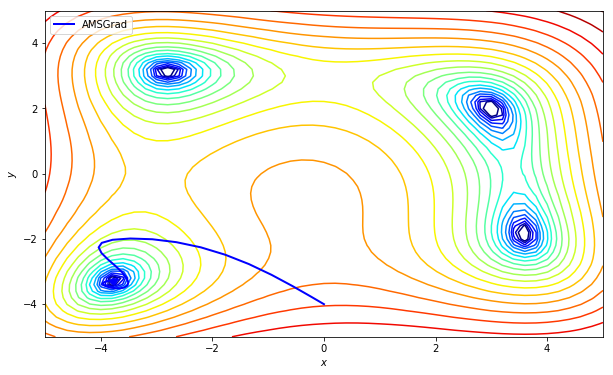

In [48]:
plotAnim(path8, "AMSGrad")
HTML(anim.to_html5_video())

# All together

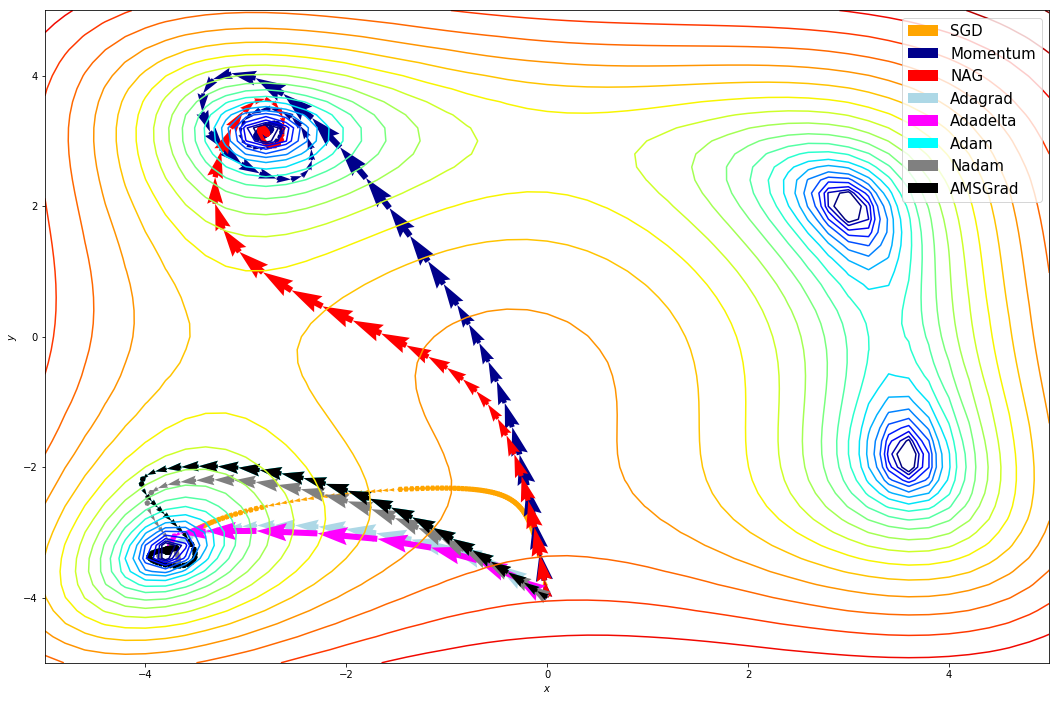

In [49]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
q1 = ax.quiver(path1[0,:-1], path1[1,:-1], path1[0,1:]-path1[0,:-1], path1[1,1:]-path1[1,:-1], scale_units='xy', angles='xy', scale=1, color='orange', label='SGD')
q2 = ax.quiver(path2[0,:-1], path2[1,:-1], path2[0,1:]-path2[0,:-1], path2[1,1:]-path2[1,:-1], scale_units='xy', angles='xy', scale=1, color='darkblue', label='Momentum')
q3 = ax.quiver(path3[0,:-1], path3[1,:-1], path3[0,1:]-path3[0,:-1], path3[1,1:]-path3[1,:-1], scale_units='xy', angles='xy', scale=1, color='red', label='NAG')
q4 = ax.quiver(path4[0,:-1], path4[1,:-1], path4[0,1:]-path4[0,:-1], path4[1,1:]-path4[1,:-1], scale_units='xy', angles='xy', scale=1, color='lightblue', label='Adagrad')
q5 = ax.quiver(path5[0,:-1], path5[1,:-1], path5[0,1:]-path5[0,:-1], path5[1,1:]-path5[1,:-1], scale_units='xy', angles='xy', scale=1, color='magenta', label='Adadelta')
q6 = ax.quiver(path6[0,:-1], path6[1,:-1], path6[0,1:]-path6[0,:-1], path6[1,1:]-path6[1,:-1], scale_units='xy', angles='xy', scale=1, color='cyan', label='Adam')
q7 = ax.quiver(path7[0,:-1], path7[1,:-1], path7[0,1:]-path7[0,:-1], path7[1,1:]-path7[1,:-1], scale_units='xy', angles='xy', scale=1, color='gray', label='Nadam')
q8 = ax.quiver(path8[0,:-1], path8[1,:-1], path8[0,1:]-path8[0,:-1], path8[1,1:]-path8[1,:-1], scale_units='xy', angles='xy', scale=1, color='black', label='AMSGrad')

#ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.legend(prop={'size': 15})